In [1]:
import os
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
from matplotlib_scalebar.scalebar import ScaleBar
from shapely.geometry.point import Point

In [2]:
region = gpd.read_file(r"D:\NUS\project\Singapore_subzone\region_2019\sg_island_region.shp")
szone = gpd.read_file(r"D:\NUS\project\Singapore_subzone\subzone_2019\sg_island_subzone_2019\master-plan-2019-subzone-boundary-no-sea-geojson-polygon.shp")
szone = szone.to_crs('EPSG:4326')
szone_coord = pd.read_csv(r"D:\NUS\project\thesis_results\spatial effect\subzone_coord.csv")
lis_szone = list(set(szone['SUBZONE_N']))
print('the number of subzone is: {}'.format(len(lis_szone)))

the number of subzone is: 328


In [3]:
region_c = szone.sort_values('SUBZONE_N')
region_c.index = range(len(region_c))
region_c = region_c[['SUBZONE_N','REGION_C']]

szone_coord = szone_coord.merge(region_c,on = 'SUBZONE_N', how = 'left')

In [4]:
def get_matrix_file(i):
    path = r'D:\NUS\project\LTA_data\commuting_flow_matrix'
    
    lis_file = os.listdir(path=path)
    
    data = pd.read_csv(path+'\\'+lis_file[i])
    
    return data

mt_commuting_flow = get_matrix_file(1)
mt_commuting_flow

,SUBZONE_N,ADMIRALTY,AIRPORT ROAD,ALEXANDRA HILL,ALEXANDRA NORTH,ALJUNIED,ANAK BUKIT,ANCHORVALE,ANG MO KIO TOWN CENTRE,ANSON,...,YIO CHU KANG EAST,YIO CHU KANG NORTH,YIO CHU KANG WEST,YISHUN CENTRAL,YISHUN EAST,YISHUN SOUTH,YISHUN WEST,YUHUA EAST,YUHUA WEST,YUNNAN
0,ADMIRALTY,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,3.010707e-03,0.000096,...,0.000000,0.000000e+00,0.000000,0.005850,0.000000,5.071946e-07,0.128384,0.000000,0.000000,0.000000
1,AIRPORT ROAD,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,...,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000
2,ALEXANDRA HILL,0.000000,0.0,0.000000,0.001269,0.003420,0.000545,0.000000,0.000000e+00,0.000457,...,0.000000,1.780698e-04,0.001164,0.004602,0.000000,2.451112e-03,0.000000,0.001241,0.002490,0.000000
3,ALEXANDRA NORTH,0.000000,0.0,0.033361,0.000000,0.000000,0.007874,0.000000,0.000000e+00,0.000000,...,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000
4,ALJUNIED,0.000000,0.0,0.000760,0.000147,0.000000,0.001667,0.000578,3.306575e-04,0.001136,...,0.000000,6.258015e-05,0.000000,0.000048,0.000000,2.502298e-05,0.005393,0.000000,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
327,YISHUN SOUTH,0.003835,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,3.548052e-07,0.000100,...,0.000000,0.000000e+00,0.000151,0.264962,0.118685,0.000000e+00,0.108417,0.000000,0.000000,0.000000
328,YISHUN WEST,0.011637,0.0,0.000059,0.000000,0.004965,0.000517,0.000788,2.288387e-03,0.000000,...,0.000077,3.978559e-08,0.000376,0.032280,0.010056,1.823990e-02,0.000000,0.000000,0.000000,0.000000
329,YUHUA EAST,0.000000,0.0,0.002082,0.000000,0.000150,0.007551,0.000000,0.000000e+00,0.000000,...,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.097612,0.007719
330,YUHUA WEST,0.000000,0.0,0.002239,0.000000,0.000000,0.006233,0.000000,0.000000e+00,0.000000,...,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.104610,0.000000,0.033079


In [5]:
points = gpd.GeoSeries([Point(102.7,1.25), Point(103.7, 1.25)], crs=4326)
points = points.to_crs('EPSG:3414')
distance_meters = points[0].distance(points[1])
distance_meters

111301.44035524513

In [6]:
lis_removed_szone = []
lis_szone1 = list(mt_commuting_flow['SUBZONE_N'])
lis_szone2 = list(szone_coord['SUBZONE_N'])
for i in lis_szone1:
    if i not in lis_szone2:
        lis_removed_szone.append(i)

cf_df = mt_commuting_flow.drop(lis_removed_szone,axis = 1).copy()

for i in lis_removed_szone:
    cf_df = cf_df.loc[cf_df['SUBZONE_N']!=i].copy()
cf_df.index = range(len(cf_df))
cf_df

,SUBZONE_N,ADMIRALTY,AIRPORT ROAD,ALEXANDRA HILL,ALEXANDRA NORTH,ALJUNIED,ANAK BUKIT,ANCHORVALE,ANG MO KIO TOWN CENTRE,ANSON,...,YIO CHU KANG EAST,YIO CHU KANG NORTH,YIO CHU KANG WEST,YISHUN CENTRAL,YISHUN EAST,YISHUN SOUTH,YISHUN WEST,YUHUA EAST,YUHUA WEST,YUNNAN
0,ADMIRALTY,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,3.010707e-03,0.000096,...,0.000000,0.000000e+00,0.000000,0.005850,0.000000,5.071946e-07,0.128384,0.000000,0.000000,0.000000
1,AIRPORT ROAD,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,...,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000
2,ALEXANDRA HILL,0.000000,0.0,0.000000,0.001269,0.003420,0.000545,0.000000,0.000000e+00,0.000457,...,0.000000,1.780698e-04,0.001164,0.004602,0.000000,2.451112e-03,0.000000,0.001241,0.002490,0.000000
3,ALEXANDRA NORTH,0.000000,0.0,0.033361,0.000000,0.000000,0.007874,0.000000,0.000000e+00,0.000000,...,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000
4,ALJUNIED,0.000000,0.0,0.000760,0.000147,0.000000,0.001667,0.000578,3.306575e-04,0.001136,...,0.000000,6.258015e-05,0.000000,0.000048,0.000000,2.502298e-05,0.005393,0.000000,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
308,YISHUN SOUTH,0.003835,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,3.548052e-07,0.000100,...,0.000000,0.000000e+00,0.000151,0.264962,0.118685,0.000000e+00,0.108417,0.000000,0.000000,0.000000
309,YISHUN WEST,0.011637,0.0,0.000059,0.000000,0.004965,0.000517,0.000788,2.288387e-03,0.000000,...,0.000077,3.978559e-08,0.000376,0.032280,0.010056,1.823990e-02,0.000000,0.000000,0.000000,0.000000
310,YUHUA EAST,0.000000,0.0,0.002082,0.000000,0.000150,0.007551,0.000000,0.000000e+00,0.000000,...,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.097612,0.007719
311,YUHUA WEST,0.000000,0.0,0.002239,0.000000,0.000000,0.006233,0.000000,0.000000e+00,0.000000,...,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.104610,0.000000,0.033079


In [7]:
def get_origin(df,i):
    szone = df.loc[i,'SUBZONE_N']
    return szone

In [8]:
def get_coord(oszone,dszone,df_coord):
    Slon = df_coord.loc[df_coord['SUBZONE_N'] == oszone]['X_COORD'].values[0]
    Slat = df_coord.loc[df_coord['SUBZONE_N'] == oszone]['Y_COORD'].values[0]
    Dlon = df_coord.loc[df_coord['SUBZONE_N'] == dszone]['X_COORD'].values[0]
    Dlat = df_coord.loc[df_coord['SUBZONE_N'] == dszone]['Y_COORD'].values[0]
    
    return Slon,Slat,Dlon,Dlat

In [9]:
def plt_commuting_flow(mt,v_threshold):
    fig, ax = plt.subplots(figsize = (20, 8))
    szone.plot(ax = ax,facecolor = "none",ec = "grey",label = 'Region')
    region.plot(ax = ax,facecolor = "none",ec = "black",label = "Subzone")
    
    region_patch = mpatches.Patch(facecolor='none',ec = 'black',label = 'region',linewidth = 1.5)
    subzone_patch = mpatches.Patch(facecolor='none',ec = 'grey',label = 'subzone')
    early_cases_patch = mpatches.Patch(facecolor='red',ec = "red",label = 'isolated subzone')

    lines = [region_patch,subzone_patch,early_cases_patch]
    labels = [t.get_label() for t in ax.collections[0:]]
    ax.legend(lines,labels,edgecolor = None,loc = 'lower right',fontsize = 16)
    ax.add_artist(ScaleBar(distance_meters,'m',length_fraction = 0.15))
    
    plt.text(103.635,1.365,s='West Region',rotation=65, rotation_mode='anchor',fontdict = {'family':'Times New Roman','size':12})
    plt.text(103.755,1.260,s='Central Region',rotation=-32, rotation_mode='anchor',fontdict = {'family':'Times New Roman','size':12})
    plt.text(103.935,1.290,s='East Region',rotation=15, rotation_mode='anchor',fontdict = {'family':'Times New Roman','size':12})
    plt.text(103.875,1.446,s='North-east Region',rotation=-26, rotation_mode='anchor',fontdict = {'family':'Times New Roman','size':12})
    plt.text(103.712,1.456,s='North Region',rotation=0, rotation_mode='anchor',fontdict = {'family':'Times New Roman','size':12})
    
    cols = list(mt.columns[1:])
    
    for i in range(len(mt)):
        szone_origin = get_origin(mt,i)
        for x in range(len(cols)):
            volumns =  mt.iloc[i,x+1]
            if volumns > v_threshold:
                slon,slat,dlon,dlat = get_coord(szone_origin,cols[x],szone_coord)
                if szone_coord.loc[szone_coord['SUBZONE_N'] == cols[x]]['REGION_C'].values[0] == 'NR':
                    plt.plot([slon , dlon], [slat, dlat], linewidth=volumns*10, color="red", alpha=0.5)
                    plt.scatter( [dlon],[dlat],color="black", alpha=0.1, s=volumns*5)
                elif szone_coord.loc[szone_coord['SUBZONE_N'] == cols[x]]['REGION_C'].values[0] == 'NER':
                    plt.plot([slon , dlon], [slat, dlat], linewidth=volumns*10, color="blue", alpha=0.5)
                    plt.scatter( [dlon],[dlat],color="black", alpha=0.1, s=volumns*5)
                elif szone_coord.loc[szone_coord['SUBZONE_N'] == cols[x]]['REGION_C'].values[0] == 'ER':
                    plt.plot([slon , dlon], [slat, dlat], linewidth=volumns*10, color="yellow", alpha=0.5)
                    plt.scatter( [dlon],[dlat],color="black", alpha=0.1, s=volumns*5)
                elif szone_coord.loc[szone_coord['SUBZONE_N'] == cols[x]]['REGION_C'].values[0] == 'CR':
                    plt.plot([slon , dlon], [slat, dlat], linewidth=volumns*10, color="lime", alpha=0.5)
                    plt.scatter( [dlon],[dlat],color="black", alpha=0.1, s=volumns*5)
                elif szone_coord.loc[szone_coord['SUBZONE_N'] == cols[x]]['REGION_C'].values[0] == 'WR':
                    plt.plot([slon , dlon], [slat, dlat], linewidth=volumns*10, color="orange", alpha=0.5)
                    plt.scatter( [dlon],[dlat],color="black", alpha=0.1, s=volumns*5)
                    
    plt.savefig(r'C:\Users\YOLO\Desktop\connection_map.jpg',dpi = 1200)

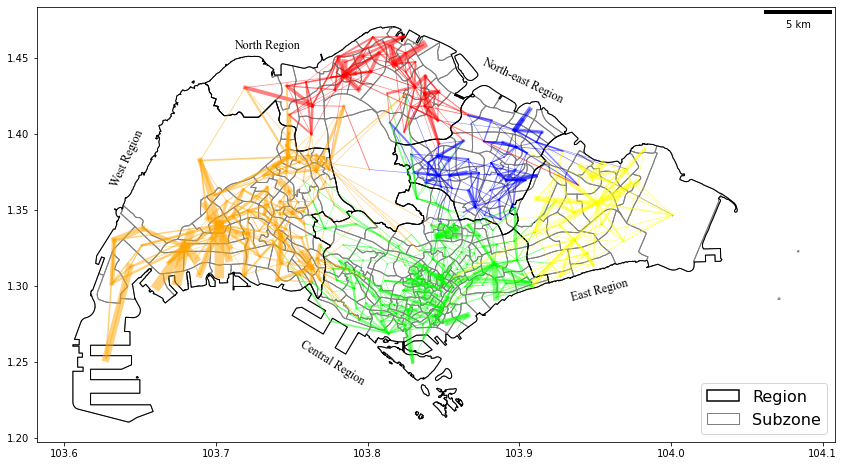

In [10]:
plt_commuting_flow(mt_commuting_flow,0.05)